In [1]:
!pip install tensorflow
!pip install tensorflow-gpu

In [2]:
import keras
keras.__version__

'2.8.0'

In [3]:
import os, shutil
import tensorflow as tf

In [4]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [5]:
# 원본 데이터셋을 압축 해제한 디렉터리 경로
original_dataset_dir = './datasets/cats_and_dogs/train'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = './datasets/cats_and_dogs_small'
if os.path.exists(base_dir):
    shutil.rmtree(base_dir)
os.mkdir(base_dir)

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

#테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
#테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# 처음 1000개의 고양이 이미지를 train_cats_dir에 복사합니다.
print('Copy files.... ')
print('---training file (cat)....')
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 validation_cats_dir 복사합니다.
print('---validation file(s) (cat).... ')
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 test_cats_dir 복사합니다.
print('---test file(s) (cat).... ')
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

# 처음 1000개의 강아지 이미지를 train_dogs_dir에 복사합니다.
print('---traing file(s) (dog).... ')
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 강아지 이미지를 validation_dogs_dir 복사합니다.
print('---validation file(s) (dog).... ')
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 강아지 이미지를 test_dogs_dir 복사합니다.
print('---test file(s) (dog).... ')
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

Copy files.... 
---training file (cat)....
---validation file(s) (cat).... 
---test file(s) (cat).... 
---traing file(s) (dog).... 
---validation file(s) (dog).... 
---test file(s) (dog).... 


In [6]:
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))
print('검증용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir)))
print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(validation_dogs_dir)))
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수: 1000
검증용 고양이 이미지 전체 개수: 500
테스트용 고양이 이미지 전체 개수: 500
훈련용 강아지 이미지 전체 개수: 1000
검증용 강아지 이미지 전체 개수: 500
테스트용 강아지 이미지 전체 개수: 500


In [7]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))                   #맨끝에 출력는 하나만 하면됨

In [8]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

C:\Users\a\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0 / 255)
validation_datagen = ImageDataGenerator(rescale = 1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
model.fit_generator(
    train_generator,
    epochs = 30,
    steps_per_epoch = 100,
    validation_data = validation_generator,
    validation_steps = 50
)

C:\Users\a\AppData\Local\Temp/ipykernel_20868/2583393768.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/30
100/100 [==============================] - 8s 64ms/step - loss: 0.6887 - acc: 0.5430 - val_loss: 0.6763 - val_acc: 0.5660
Epoch 2/30
100/100 [==============================] - 7s 67ms/step - loss: 0.6537 - acc: 0.6245 - val_loss: 0.6332 - val_acc: 0.6470
Epoch 3/30
100/100 [==============================] - 7s 66ms/step - loss: 0.5951 - acc: 0.6900 - val_loss: 0.5951 - val_acc: 0.6690
Epoch 4/30
100/100 [==============================] - 6s 61ms/step - loss: 0.5531 - acc: 0.7240 - val_loss: 0.5889 - val_acc: 0.6760
Epoch 5/30
100/100 [==============================] - 6s 63ms/step - loss: 0.5208 - acc: 0.7420 - val_loss: 0.6366 - val_acc: 0.6440
Epoch 6/30
100/100 [==============================] - 6s 64ms/step - loss: 0.4885 - acc: 0.7655 - val_loss: 0.6054 - val_acc: 0.6650
Epoch 7/30
100/100 [==============================] - 6s 62ms/step - loss: 0.4595 - acc: 0.7765 - val_loss: 0.5464 - val_acc: 0.7160
Epoch 8/30
100/100 [==============================] - 6s 60ms/step - 

In [11]:
model.save('cats_and_dogs_small_1.h5')

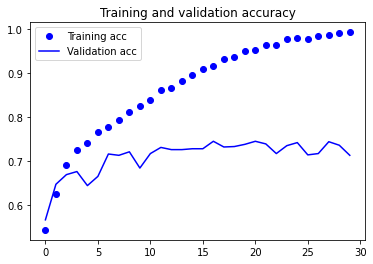

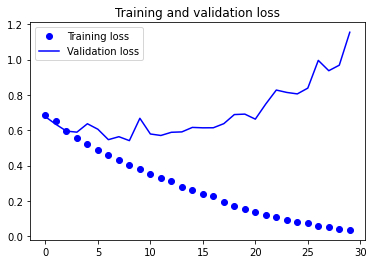

In [12]:
history = model.history

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

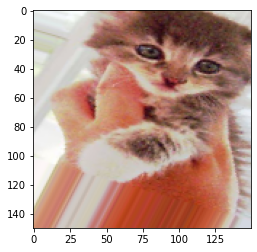

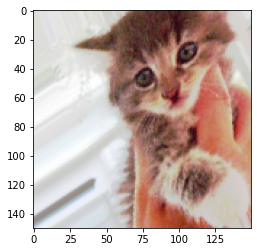

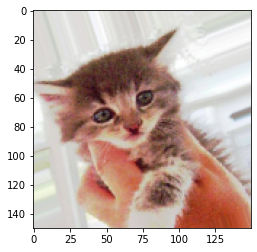

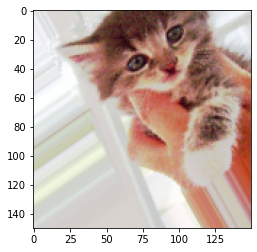

In [13]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# 이미지 전처리 유틸리티 모듈
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

# 증식할 이미지 선택합니다
img_path = fnames[3]

# 이미지를 읽고 크기를 변경합니다
img = image.load_img(img_path, target_size=(150, 150))

# (150, 150, 3) 크기의 넘파이 배열로 변환합니다
x = image.img_to_array(img)

# (1, 150, 150, 3) 크기로 변환합니다
x = x.reshape((1,) + x.shape)

# flow() 메서드는 랜덤하게 변환된 이미지의 배치를 생성합니다.
# 무한 반복되기 때문에 어느 지점에서 중지해야 합니다!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

C:\Users\a\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [15]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

C:\Users\a\AppData\Local\Temp/ipykernel_20868/852078601.py:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 15s 138ms/step - loss: 0.6930 - acc: 0.5165 - val_loss: 0.6862 - val_acc: 0.5020
Epoch 2/100
100/100 [==============================] - 14s 136ms/step - loss: 0.6861 - acc: 0.5555 - val_loss: 0.6739 - val_acc: 0.5550
Epoch 3/100
100/100 [==============================] - 14s 142ms/step - loss: 0.6762 - acc: 0.5750 - val_loss: 0.6786 - val_acc: 0.5460
Epoch 4/100
100/100 [==============================] - 14s 135ms/step - loss: 0.6615 - acc: 0.6125 - val_loss: 0.6548 - val_acc: 0.6030
Epoch 5/100
100/100 [==============================] - 13s 131ms/step - loss: 0.6524 - acc: 0.6160 - val_loss: 0.6447 - val_acc: 0.6220
Epoch 6/100
100/100 [==============================] - 13s 133ms/step - loss: 0.6426 - acc: 0.6265 - val_loss: 0.6322 - val_acc: 0.6390
Epoch 7/100
100/100 [==============================] - 13s 131ms/step - loss: 0.6351 - acc: 0.6370 -

100/100 [==============================] - 14s 137ms/step - loss: 0.4562 - acc: 0.7870 - val_loss: 0.4774 - val_acc: 0.7780
Epoch 61/100
100/100 [==============================] - 13s 132ms/step - loss: 0.4489 - acc: 0.7845 - val_loss: 0.4763 - val_acc: 0.7800
Epoch 62/100
100/100 [==============================] - 13s 133ms/step - loss: 0.4472 - acc: 0.7850 - val_loss: 0.4579 - val_acc: 0.7900
Epoch 63/100
100/100 [==============================] - 13s 128ms/step - loss: 0.4387 - acc: 0.7925 - val_loss: 0.4494 - val_acc: 0.7910
Epoch 64/100
100/100 [==============================] - 14s 137ms/step - loss: 0.4409 - acc: 0.7995 - val_loss: 0.4450 - val_acc: 0.8040
Epoch 65/100
100/100 [==============================] - 14s 137ms/step - loss: 0.4275 - acc: 0.7995 - val_loss: 0.4563 - val_acc: 0.7840
Epoch 66/100
100/100 [==============================] - 14s 142ms/step - loss: 0.4575 - acc: 0.7880 - val_loss: 0.5116 - val_acc: 0.7490
Epoch 67/100
100/100 [==============================] 

In [16]:
model.save('cats_and_dogs_small_2.h5')

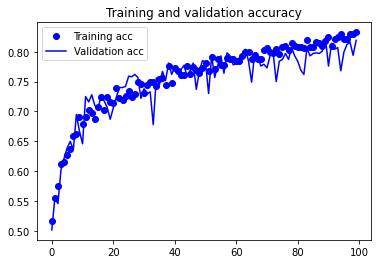

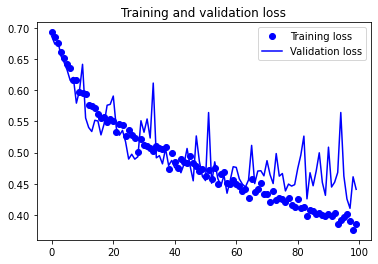

In [17]:
acc = history.history['acc'] 
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()